# Final Project

##1.Data Understanding & Preparation

In [ ]:
# Import Data
import pandas as pd # Data Manipulating
import numpy as np # Support large multi-dimensional array
import matplotlib.pyplot as plt #Basic Plot di Python
import seaborn as sns #plot alternatif dari matplotlib dengan beberapa fitur berebeda
pd.options.mode.chained_assignment = None  # default='warn
pd.set_option('display.float_format', lambda x: '%.2f' % x) # set 2 angka dibelakang koma (desimal)
from scipy import stats #keperluan perhitungan statistik
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
marketing = pd.read_csv("/content/drive/MyDrive/Python Github/Final Project/(NEW) users_order_items.csv")
marketing.head()

,id,age,gender,state,country,latitude,longitude,traffic_source,user_id,order_id,status,sale_price
0,22279,68,F,Dolnośląskie,Poland,51.22,15.73,Search,22279,27603,Complete,105.00
1,22823,69,F,Dolnośląskie,Poland,51.22,15.73,Search,22823,28262,Complete,25.00
2,22823,69,F,Dolnośląskie,Poland,51.22,15.73,Search,22823,28262,Complete,22.50
3,22823,69,F,Dolnośląskie,Poland,51.22,15.73,Search,22823,28262,Complete,24.99
4,22823,69,F,Dolnośląskie,Poland,51.22,15.73,Search,22823,28262,Complete,39.98


In [ ]:
marketing.tail()

,id,age,gender,state,country,latitude,longitude,traffic_source,user_id,order_id,status,sale_price
39752,42632,46,F,São Paulo,Brasil,-23.35,-46.87,Organic,42632,52980,Complete,106.70
39753,73693,28,F,São Paulo,Brasil,-23.35,-46.87,Organic,73693,91858,Complete,12.99
39754,30632,50,M,São Paulo,Brasil,-23.35,-46.87,Search,30632,37925,Complete,13.50
39755,40397,36,M,São Paulo,Brasil,-23.35,-46.87,Facebook,40397,50181,Complete,25.00
39756,53820,50,M,São Paulo,Brasil,-23.35,-46.87,Search,53820,67025,Complete,236.98


In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39757 entries, 0 to 39756
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              39757 non-null  int64  
 1   age             39757 non-null  int64  
 2   gender          39757 non-null  object 
 3   state           39757 non-null  object 
 4   country         39757 non-null  object 
 5   latitude        39757 non-null  float64
 6   longitude       39757 non-null  float64
 7   traffic_source  39757 non-null  object 
 8   user_id         39757 non-null  int64  
 9   order_id        39757 non-null  int64  
 10  status          39757 non-null  object 
 11  sale_price      39757 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 3.6+ MB


In [ ]:
marketing.isna().values.any()

False

In [ ]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39757.00,50346.76,28867.61,1.00,25706.00,50489.00,75412.00,99996.00
age,39757.00,40.88,16.94,12.00,26.00,41.00,56.00,70.00
latitude,39757.00,34.18,16.21,-42.88,30.60,36.63,41.63,64.87
longitude,39757.00,35.01,91.52,-158.16,-71.11,80.23,117.29,153.48
user_id,39757.00,50346.76,28867.61,1.00,25706.00,50489.00,75412.00,99996.00
order_id,39757.00,62626.92,36026.49,1.00,31790.00,62798.00,93952.00,124506.00
sale_price,39757.00,59.77,65.54,0.02,24.56,39.99,69.95,999.00


In [ ]:
marketing['sale_price'].describe().T

count   39757.00
mean       59.77
std        65.54
min         0.02
25%        24.56
50%        39.99
75%        69.95
max       999.00
Name: sale_price, dtype: float64

In [ ]:
marketing['traffic_source'].describe().T

count      39757
unique         5
top       Search
freq       27899
Name: traffic_source, dtype: object

Terdapat 5 traffic sources bagi para user untuk bisa menemukan situs The Look

In [ ]:
marketing['country'].describe().T

count     39757
unique       15
top       China
freq      15442
Name: country, dtype: object

User The Look berasal dari 15 negara yang berbeda, yang terbanyak berasal dari China

In [ ]:
marketing.shape

(39757, 12)

In [ ]:
marketing.isnull().sum()

id                0
age               0
gender            0
state             0
country           0
latitude          0
longitude         0
traffic_source    0
user_id           0
order_id          0
status            0
sale_price        0
dtype: int64

In [ ]:
marketing.duplicated().sum()

66

In [ ]:
marketing.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39752    False
39753    False
39754    False
39755    False
39756    False
Length: 39757, dtype: bool

In [ ]:
marketing.duplicated().any()

True

In [ ]:
marketing[marketing.duplicated(keep=False)]
# menunjukkan data mana saja yang duplikasi
# coba evaluasi lagi perlu didrop atau enggak


,id,age,gender,state,country,latitude,longitude,traffic_source,user_id,order_id,status,sale_price
149,52840,45,F,England,United Kingdom,53.37,-1.44,Search,52840,65781,Complete,25.00
150,52840,45,F,England,United Kingdom,53.37,-1.44,Search,52840,65781,Complete,25.00
823,92748,49,M,England,United Kingdom,53.56,-2.19,Organic,92748,115448,Complete,65.00
824,92748,49,M,England,United Kingdom,53.56,-2.19,Organic,92748,115448,Complete,65.00
934,90486,40,F,England,United Kingdom,52.93,-1.13,Search,90486,112648,Complete,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...
37742,78794,29,F,Gyeonggi-do,South Korea,37.67,127.28,Search,78794,98217,Complete,25.00
38604,73837,63,M,Tokyo,Japan,35.64,139.70,Search,73837,92019,Complete,13.99
38605,73837,63,M,Tokyo,Japan,35.64,139.70,Search,73837,92019,Complete,13.99
38968,6699,51,M,Kanagawa,Japan,35.44,139.68,Search,6699,8174,Complete,49.00


In [ ]:
marketing.duplicated().value_counts()

False    39691
True        66
dtype: int64

##2.Data Cleaning

In [ ]:
marketing = marketing.drop_duplicates()


In [ ]:
marketing.shape

(39691, 12)

##3.Data Visualization

In [ ]:
marketing_boxplot = marketing.drop(['id', 'latitude', 'longitude', 'user_id', 'order_id'], axis=1)

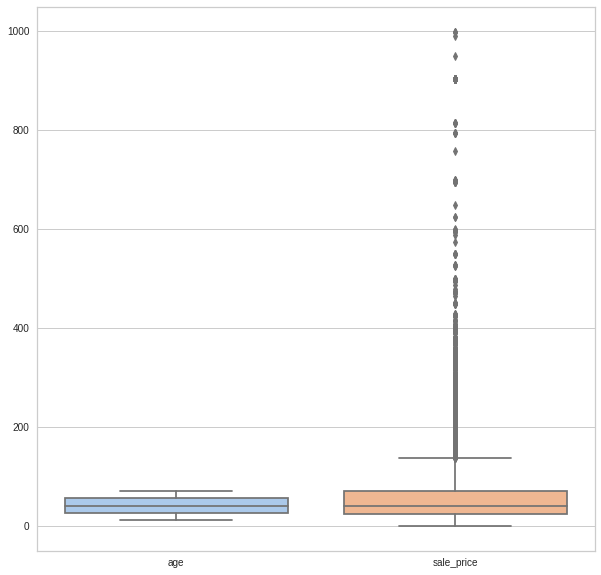

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

warna = sns.color_palette('pastel')   #ini buat warna doang
sns.boxplot(data=marketing_boxplot, palette=(warna))

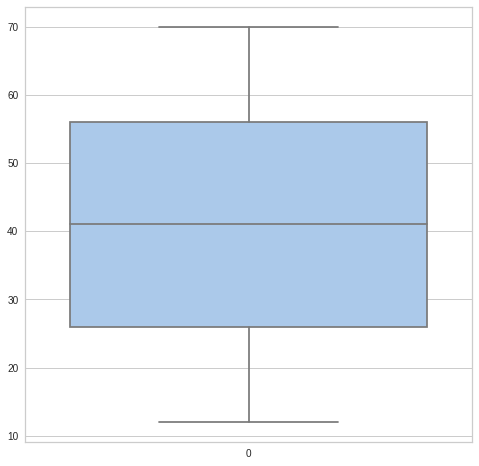

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
warna = sns.color_palette('pastel')   #ini buat warna doang
sns.boxplot(data=marketing_boxplot['age'], palette=(warna))

dari sini dapat dilihat bahwa dalam variabel umur tidak terdapat adanya outliers

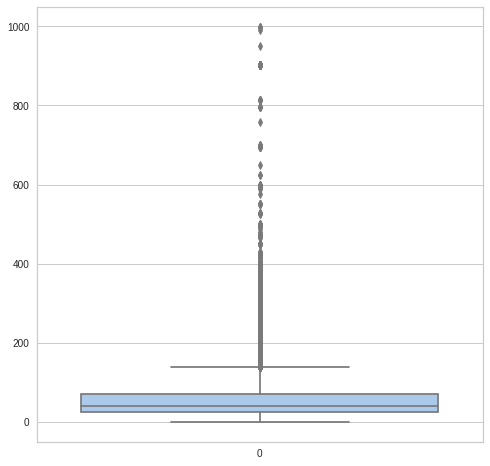

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
warna = sns.color_palette('pastel')   #ini buat warna doang
sns.boxplot(data=marketing_boxplot['sale_price'], palette=(warna))

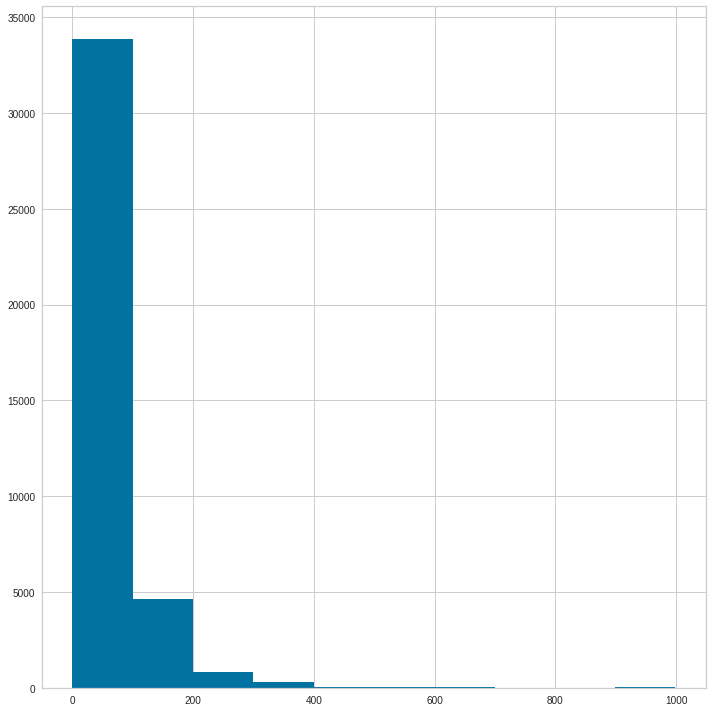

In [ ]:
marketing['sale_price'].hist(figsize=(10,10), bins=10)
plt.tight_layout()

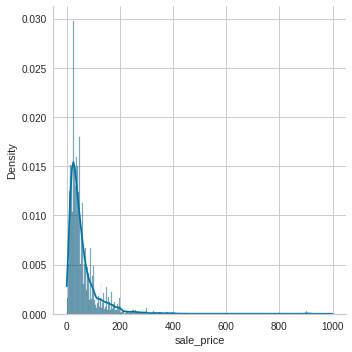

In [ ]:
sns.displot(data=marketing, x="sale_price",kde=True,stat="density")

dalam variabel sale_price terdapat banyak outliers dan dibiarkan saja karena

In [ ]:
marketing['sale_price'].describe().T

count   39757.00
mean       59.77
std        65.54
min         0.02
25%        24.56
50%        39.99
75%        69.95
max       999.00
Name: sale_price, dtype: float64

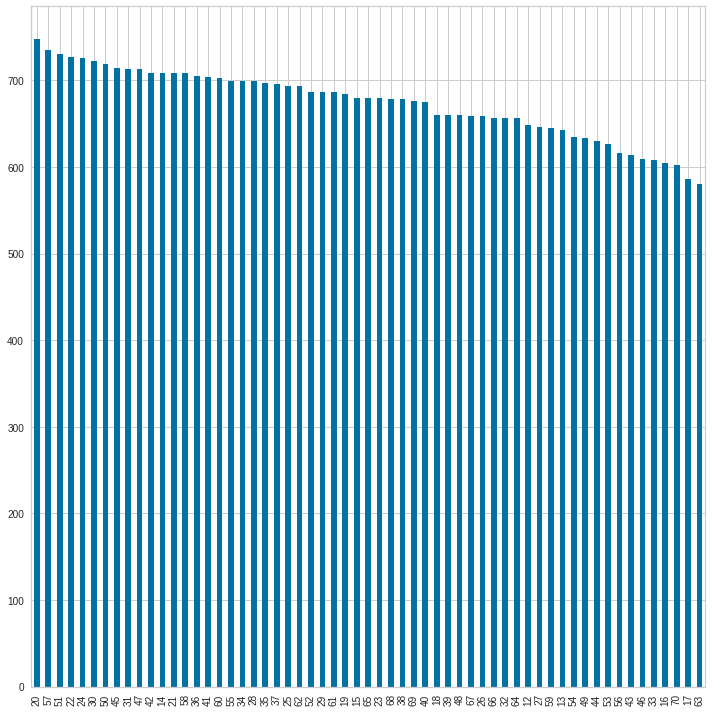

In [ ]:
marketing['age'].value_counts().plot.bar(figsize=(10,10))
plt.tight_layout()
plt.show()

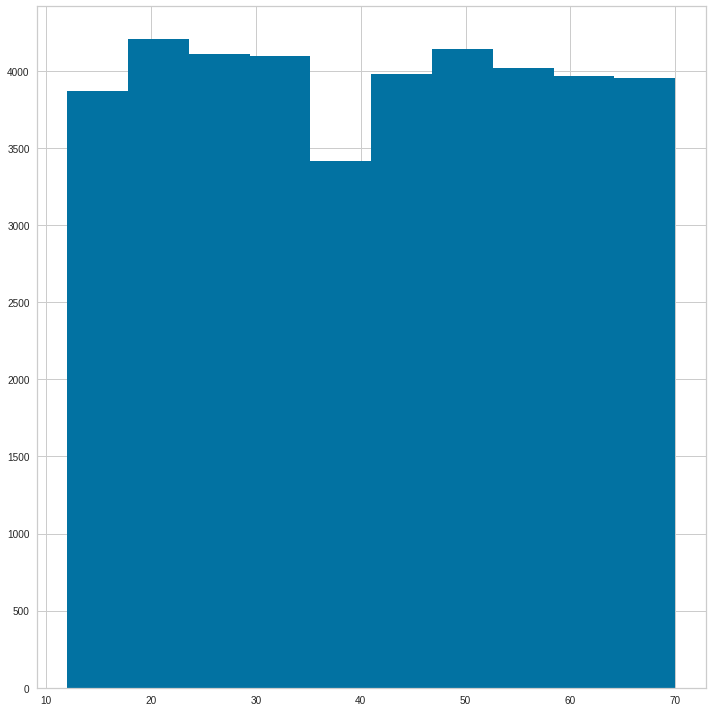

In [ ]:
marketing['age'].hist(figsize=(10,10), bins=10)
plt.tight_layout()

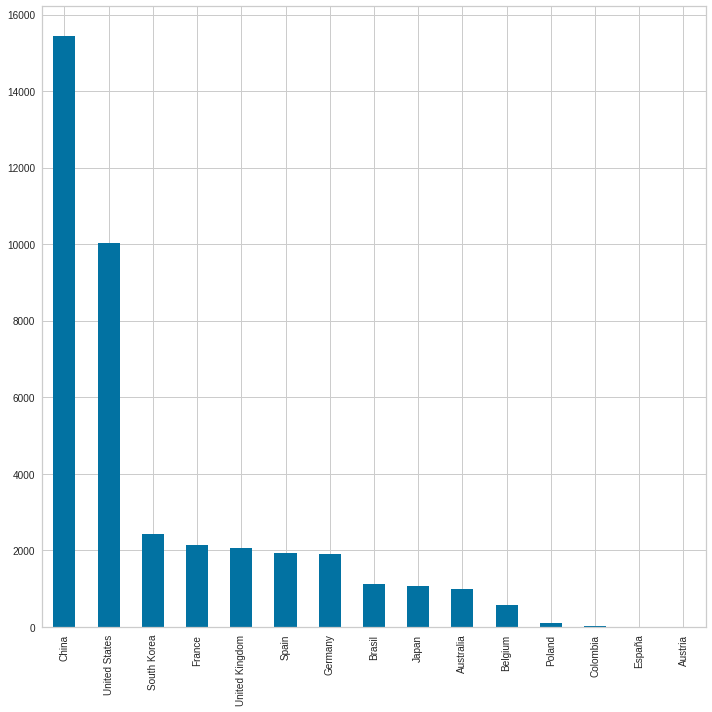

In [ ]:
marketing['country'].value_counts().plot.bar(figsize=(10,10))
plt.tight_layout()
plt.show()

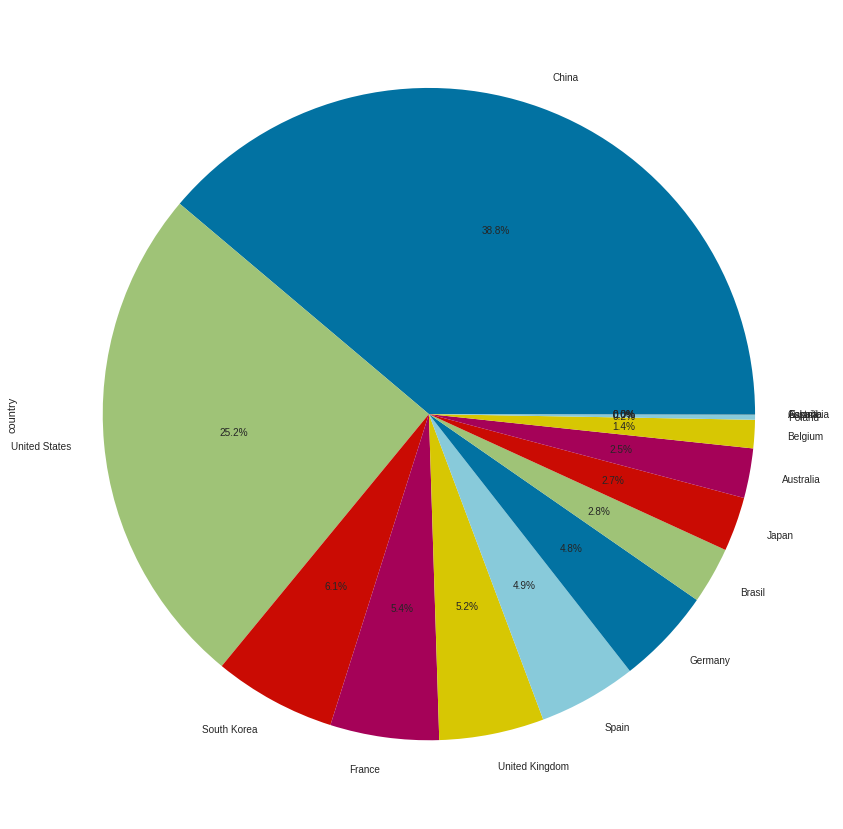

In [ ]:
#presantase tiap kategori
marketing['country'].value_counts().plot(figsize=(15,15),kind='pie', autopct = "%.1f%%")

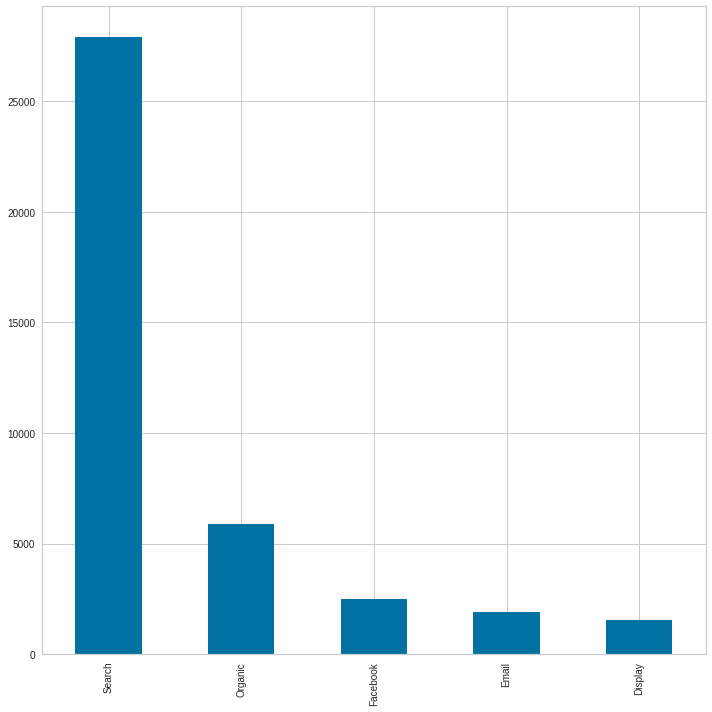

In [ ]:
marketing['traffic_source'].value_counts().plot.bar(figsize=(10,10))
plt.tight_layout()
plt.show()

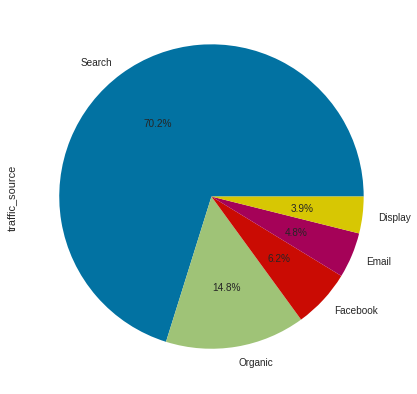

In [ ]:
#presantase tiap kategori
marketing['traffic_source'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

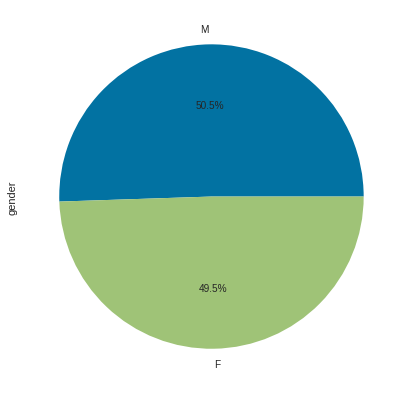

In [ ]:
#presantase tiap kategori
marketing['gender'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

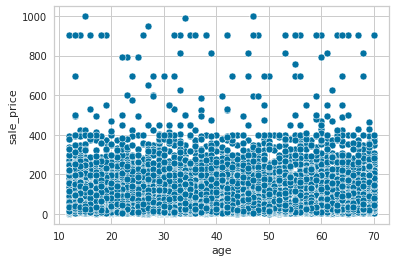

In [ ]:
sns.scatterplot(x="age", y="sale_price", data=marketing);
sns.set(rc={'figure.figsize':(40.7,8.27)})

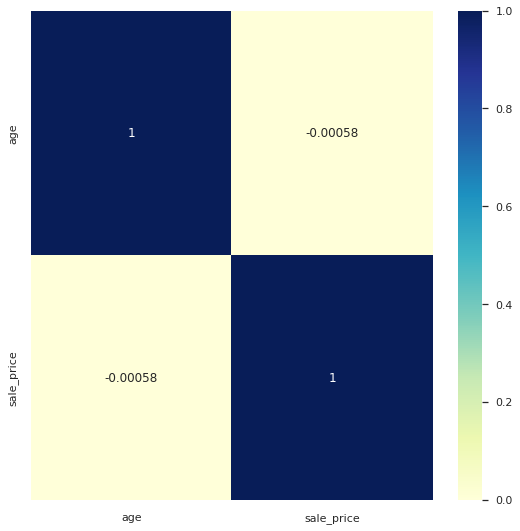

In [ ]:
# visualisasi heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(marketing_boxplot.corr(), annot=True,cmap="YlGnBu")